## Problem statement

The prices of new cars in the industry is fixed by the manufacturer 
with some additional costs incurred by the Government in the form of 
taxes. So, customers buying a new car can be assured of the money 
they invest to be worthy.
There is a need for a used car price prediction system to effectively 
determine the worthiness of the car using a variety of features. Even 
though there are websites that offers this service, their prediction method 
may not be the best. Besides, different models and systems may contribute 
on predicting power for a used car’s actual market value. It is important 
to know their actual market value while both buying and selling.

## Dataset discription

This dataset contains over 7000+ true value cars data across all major 
tier 1 and tier 2 cities in India which is ready to accept a different owner. 
The information includes car manufacturer, model, fuel type, year of manufacture 
to mention a few.

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)

## Import data

### Train data

In [2]:
train = pd.read_csv(r'train.csv', header = 0)
train.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


### Test data

In [3]:
test = pd.read_csv(r'test.csv', header = 0)
test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


## Preprocessing

### Train data

In [4]:
# Cheaking shape & datatypes of variables.
print(train.shape)
print(train.dtypes)

(6399, 30)
id                       int64
car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on           object
fitness_certificate     object
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object


In [5]:
train.describe()

,id,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,6399.000000,6399.000000,6399.000000,6.399000e+03,6399.000000,6399.000000,6.399000e+03,3.575000e+03,6399.000000,6399.000000
mean,3200.000000,2013.895921,62382.210970,4.546049e+05,1534.860916,1.325988,4.318857e+05,5.507506e+05,10559.340678,68190.888576
std,1847.376518,3.088329,43087.788245,2.779465e+05,1965.452173,0.574816,2.853266e+05,3.114276e+05,6456.001562,41692.006252
min,1.000000,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,1.150990e+05,0.000000,0.000000
25%,1600.500000,2012.000000,31555.000000,2.822990e+05,554.000000,1.000000,2.536445e+05,3.424855e+05,6557.000000,42345.000000
50%,3200.000000,2014.000000,55490.000000,3.820990e+05,1080.000000,1.000000,3.609670e+05,4.672500e+05,8875.000000,57315.000000
75%,4799.500000,2016.000000,84145.000000,5.400000e+05,1912.000000,2.000000,5.255875e+05,6.663375e+05,12543.000000,81000.000000
max,6399.000000,2021.000000,996609.000000,3.600000e+06,46141.000000,6.000000,3.250000e+06,2.765057e+06,83619.000000,540000.000000


In [6]:
# Cheack uniques value counts in variables.
train.nunique()

id                     6399
car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6243
sale_price             4118
city                     13
times_viewed           2954
body_type                 5
transmission              2
variant                 873
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
broker_quote           5693
original_price         3476
car_rating                4
ad_created_on          6398
fitness_certificate       2
emi_starts_from        4048
booking_down_pymnt     4048
reserved                  2
warranty_avail            2
dtype: int64

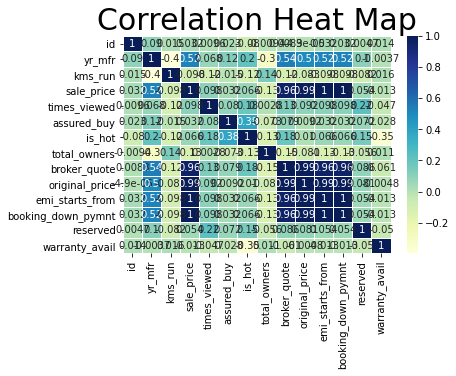

In [7]:
# No multicollinearity: There should be no multicollinearity between the independent variable

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'YlGnBu')
plt.title('Correlation Heat Map', fontsize = 30)
plt.show()

<!-- # We can observed that original_price, emi_starts_from, booking_down_payment and broker_quote
# are highly correlated with our target variable.
# So removing original_price because it has null values too and removing emi_starts_from, booking_down_payment. -->

We can observe from above that sale_price,emi_starts_from,booking_down_pymnt original_price ,broker_quote are highly correlated and sale_price is our target variable

Here i am removing above mentioned columns and keeping booking_down_payment as it is I am removing original_price also because as we observed above it has null values

And also removing Id column because it doesn't effect our target column.

In [8]:
# Feature selection
train = train.drop(columns = ['original_price', 'emi_starts_from', 'booking_down_pymnt', 'id'], axis = 1)

In [9]:
train.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,great,2021-04-04T07:09:18.583,True,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,great,2021-03-22T14:07:32.833,True,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,great,2021-03-20T05:36:31.311,True,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,great,2021-01-21T12:59:19.299,True,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,great,2021-04-01T13:33:40.733,True,False,False


## Duplicate values

In [10]:
train.duplicated().sum()

0

## Handling Null values

In [11]:
# Checking null values

train.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
broker_quote             0
car_rating               7
ad_created_on            1
fitness_certificate      8
reserved                 0
warranty_avail           0
dtype: int64

In [12]:
# Replacecing categorical data with mode values.

for value in ['body_type', 'transmission', 'registered_city', 'registered_state', 
              'source', 'car_availability', 'car_rating', 'fitness_certificate']:
    train[value].fillna(train[value].mode()[0], inplace = True)

In [13]:
# replace missing value of ad_created_on using backward fill

train = train.fillna(method="bfill")

In [14]:
train.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
car_rating             0
ad_created_on          0
fitness_certificate    0
reserved               0
warranty_avail         0
dtype: int64

In [15]:
train.value_counts(['body_type'])

body_type   
hatchback       3888
sedan           1261
suv              946
luxury suv       169
luxury sedan     135
dtype: int64

In [16]:
train.value_counts(['transmission'])

transmission
manual          5855
automatic        544
dtype: int64

In [17]:
train.value_counts(['registered_city'])

registered_city
delhi              840
bengaluru          570
chennai            531
hyderabad          512
pune               504
                  ... 
east godavari        1
eluru                1
etawah               1
faizabad             1
yavatmal             1
Length: 230, dtype: int64

In [18]:
train.value_counts(['registered_state'])

registered_state
maharashtra         1820
delhi               1104
karnataka           1068
tamil nadu           625
telangana            512
haryana              486
uttar pradesh        364
gujarat              355
andhra pradesh        33
west bengal           21
uttarakhand            3
chandigarh             2
chhattisgarh           2
rajasthan              2
jharkhand              1
punjab                 1
dtype: int64

In [19]:
train.value_counts(['source'])

source              
inperson_sale           6018
online                   344
customer_to_customer      37
dtype: int64

In [20]:
train.value_counts(['car_availability'])

car_availability
in_stock            6146
in_transit           193
pickup_pending        38
out_of_stock          22
dtype: int64

In [21]:
train.value_counts(['car_rating'])

car_rating
great         5454
good           760
fair           114
overpriced      71
dtype: int64

In [22]:
train.value_counts(['ad_created_on'])

ad_created_on          
2020-07-26T06:04:55.876    2
2019-02-20T14:13:30.464    1
2021-03-24T09:02:48.818    1
2021-03-24T10:02:05.108    1
2021-03-24T10:00:48.898    1
                          ..
2021-02-27T11:17:08.446    1
2021-02-27T11:07:38.485    1
2021-02-27T11:06:28.267    1
2021-02-27T10:40:13.495    1
2021-05-30T15:19:17.393    1
Length: 6398, dtype: int64

In [23]:
train.value_counts(['fitness_certificate'])

fitness_certificate
True                   6275
False                   124
dtype: int64

## Checking outliers

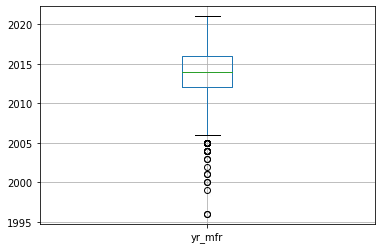

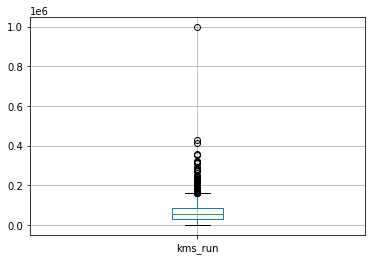

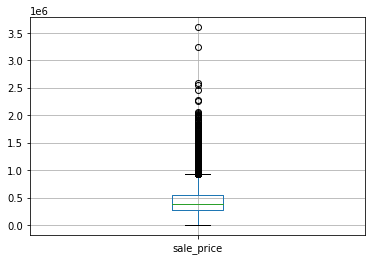

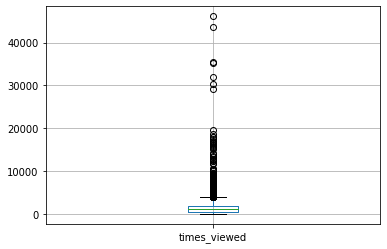

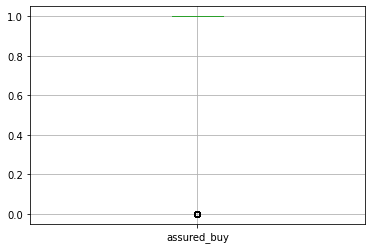

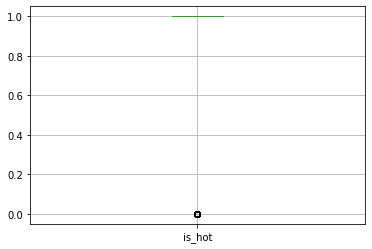

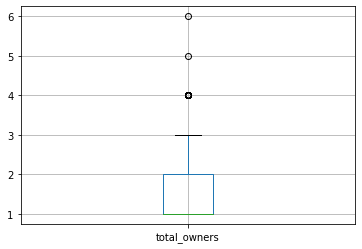

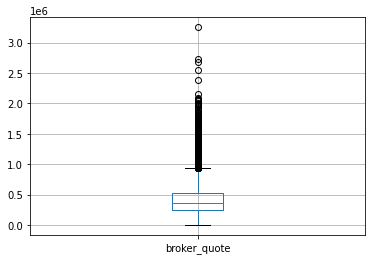

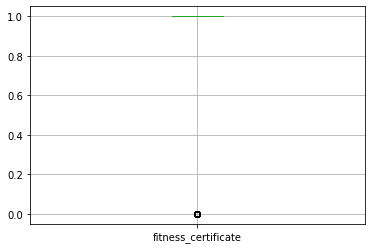

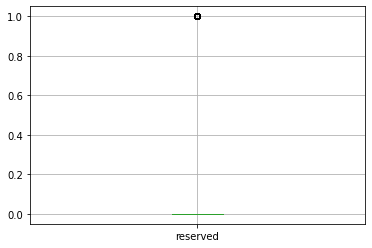

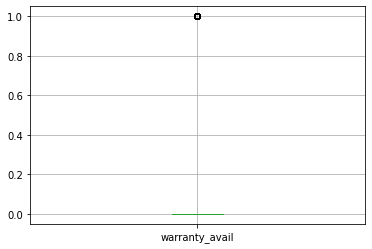

In [24]:
# Assumption : There should be no outliers
# Check using Boxplot

for x in train.columns:
    if train[x].dtypes!="O":
        train.boxplot(column=x)
        plt.show()

In [25]:
train = train[train['yr_mfr']>2005]
train.shape

(6360, 26)

In [26]:
max_km_run = train['kms_run'].max()
max_km_run

996609

In [27]:
train = train[train['kms_run']<max_km_run]
train.shape

(6359, 26)

In [28]:
train = train[train['sale_price']<3000000]
train.shape

(6357, 26)

In [29]:
train = train[train['times_viewed']<25000]
train.shape

(6350, 26)

In [30]:
# train = train[train['broker_quote']<3000000]
# train.shape

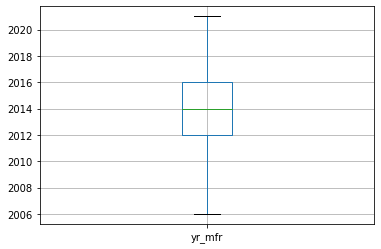

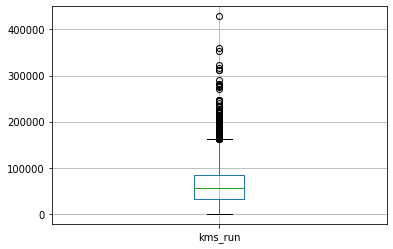

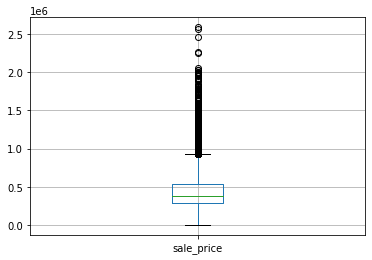

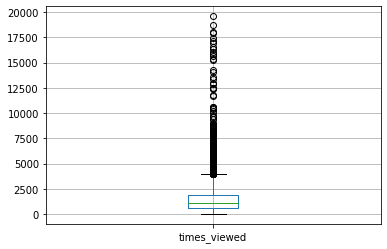

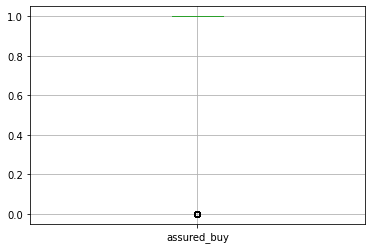

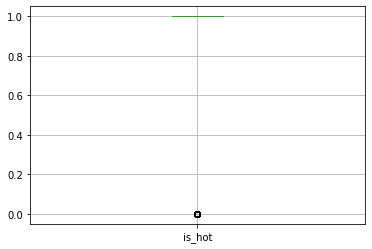

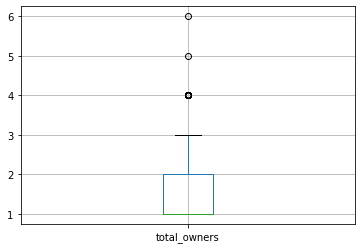

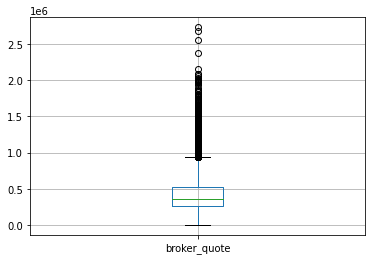

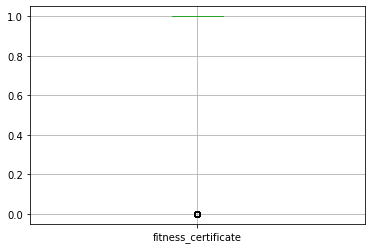

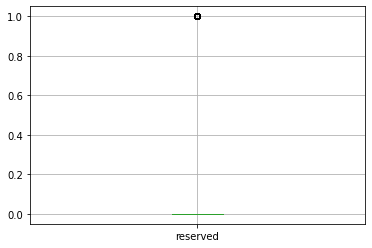

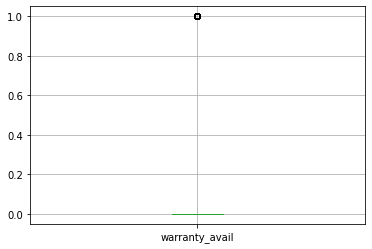

In [31]:
# Removed all outliers

for x in train.columns:
    if train[x].dtypes!="O":
        train.boxplot(column=x)
        plt.show()

## Test data

In [32]:
test = pd.read_csv(r'test.csv', header = 0)
test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [33]:
print(test.shape)
print(test.dtypes)

(1000, 30)
id                       int64
car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on           object
fitness_certificate       bool
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object


In [34]:
test.describe()

,id,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,5.450000e+02,1000.000000,1000.000000
mean,500.500000,2013.81700,64200.546000,4.564917e+05,1649.047000,1.336000,4.340296e+05,5.529012e+05,10603.155000,68473.909000
std,288.819436,3.08367,46279.250371,3.116202e+05,2703.996647,0.611128,3.049773e+05,3.159273e+05,7238.156858,46743.080291
min,1.000000,2002.00000,379.000000,3.500000e+04,6.000000,1.000000,0.000000e+00,9.689900e+04,813.000000,5250.000000
25%,250.750000,2012.00000,33159.500000,2.727740e+05,556.000000,1.000000,2.464942e+05,3.304990e+05,6336.000000,40916.250000
50%,500.500000,2014.00000,56880.000000,3.836490e+05,1155.500000,1.000000,3.618295e+05,4.688120e+05,8911.000000,57547.500000
75%,750.250000,2016.00000,84372.500000,5.433740e+05,2036.500000,2.000000,5.267560e+05,6.912220e+05,12621.250000,81506.250000
max,1000.000000,2020.00000,640251.000000,3.866000e+06,61930.000000,5.000000,3.250000e+06,2.706469e+06,89798.000000,579901.000000


## We removed some columns in train data so we remove same columns in test data also

In [35]:
test = test.drop(columns = ['original_price', 'emi_starts_from', 'booking_down_pymnt', 'id'], axis = 1)
test.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,363529,great,2021-03-16T05:00:49.555,True,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,205738,great,2021-03-10T12:08:11.905,True,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,382667,great,2021-03-15T12:03:30.041,True,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,335740,great,2021-04-09T11:16:26.157,True,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,1119840,great,2021-04-01T07:24:31.712,True,False,False


In [36]:
test.shape

(1000, 26)

In [37]:
train.shape

(6350, 26)

## handling missing values

In [38]:
test.isnull().sum()

car_name                0
yr_mfr                  0
fuel_type               0
kms_run                 0
sale_price              0
city                    0
times_viewed            0
body_type              13
transmission           82
variant                 0
assured_buy             0
registered_city         2
registered_state        2
is_hot                  0
rto                     0
source                 12
make                    0
model                   0
car_availability       78
total_owners            0
broker_quote            0
car_rating              2
ad_created_on           0
fitness_certificate     0
reserved                0
warranty_avail          0
dtype: int64

In [39]:
# Replacecing categorical data with mode values.

for value in ['body_type', 'transmission', 'registered_city', 'registered_state', 
              'source', 'car_availability', 'car_rating']:
    test[value].fillna(test[value].mode()[0], inplace = True)

In [40]:
test.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
car_rating             0
ad_created_on          0
fitness_certificate    0
reserved               0
warranty_avail         0
dtype: int64

## Checking outliers

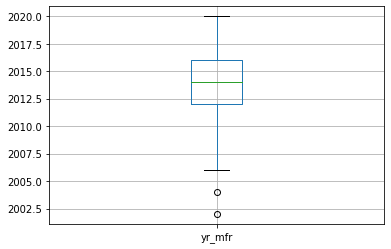

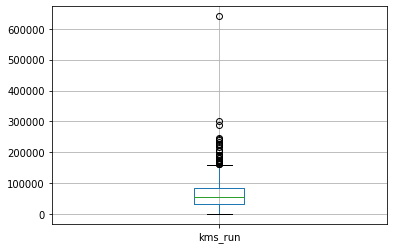

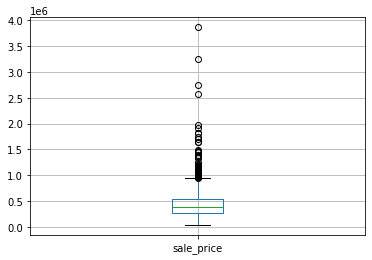

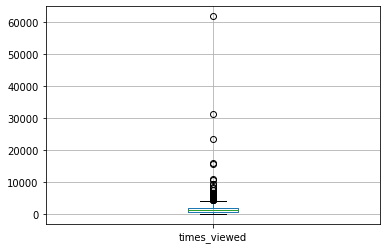

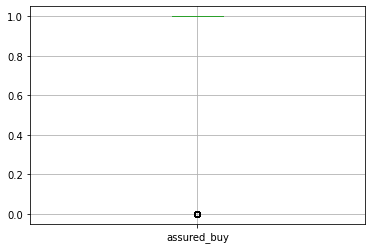

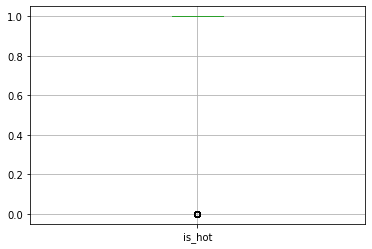

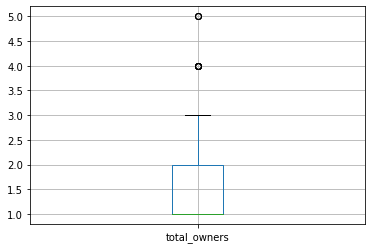

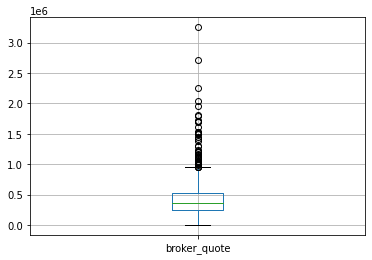

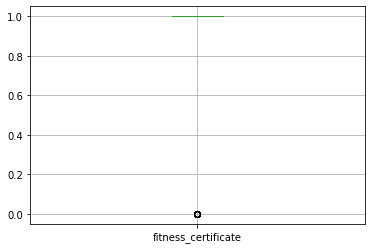

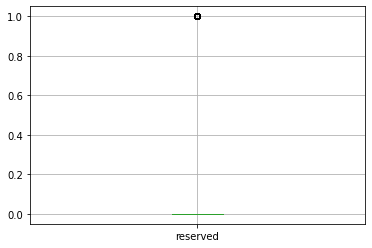

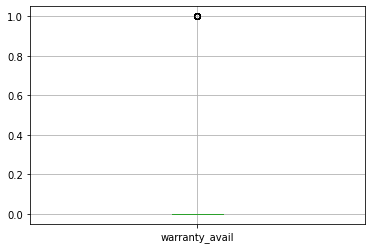

In [41]:
for x in test.columns:
    if test[x].dtypes!="O":
        test.boxplot(column=x)
        plt.show()

In [42]:
test = test[test['yr_mfr']>2005]
test.shape

(998, 26)

In [43]:
max_km_run_test = test['kms_run'].max()
max_km_run

996609

In [44]:
test = test[test['kms_run']<max_km_run_test]
test.shape

(997, 26)

In [45]:
test = test[test['sale_price']<3000000]
test.shape

(995, 26)

In [46]:
test = test[test['times_viewed']<25000]
test.shape

(993, 26)

## Creating X and Y

In [47]:
# Using train data to create X_train & Y_train.

X_train = train.drop('sale_price', axis=1)
Y_train = train['sale_price']

In [48]:
# Using test data to create X_test & Y_test.

X_test = test.drop('sale_price', axis=1)
Y_test = test['sale_price']

In [49]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6350, 25)
(6350,)
(993, 25)
(993,)


## Scaling the data

### Train data

In [50]:
# Scaling only numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# get numeric data
num_d = X_train.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_train[num_d.columns] = scaler.fit_transform(num_d)

In [51]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,maruti swift,0.348793,petrol,-1.310656,noida,10.813105,hatchback,manual,lxi opt,0.445353,delhi,delhi,0.280769,dl6c,inperson_sale,maruti,swift,in_stock,1.191689,-0.128642,great,2021-04-04T07:09:18.583,0.121248,-0.521081,-0.17129
1,maruti alto 800,0.684068,petrol,-0.945253,noida,0.736144,hatchback,manual,lxi,0.445353,noida,uttar pradesh,0.280769,up16,inperson_sale,maruti,alto 800,in_stock,-0.564455,-0.570853,great,2021-03-22T14:07:32.833,0.121248,-0.521081,-0.17129
2,hyundai grand i10,1.019344,petrol,-0.938013,noida,-0.562508,hatchback,manual,sports 1.2 vtvt,0.445353,agra,uttar pradesh,0.280769,up80,inperson_sale,hyundai,grand i10,in_stock,-0.564455,0.126344,great,2021-03-20T05:36:31.311,0.121248,-0.521081,-0.17129
3,maruti swift,-0.321759,diesel,-0.556066,noida,3.145593,hatchback,manual,vdi,0.445353,delhi,delhi,0.280769,dl1c,inperson_sale,maruti,swift,in_stock,-0.564455,-0.495249,great,2021-01-21T12:59:19.299,0.121248,-0.521081,-0.17129
4,hyundai grand i10,0.348793,petrol,-0.969255,noida,1.081069,hatchback,manual,magna 1.2 vtvt,-2.245410,new delhi,delhi,0.280769,dl12,inperson_sale,hyundai,grand i10,in_stock,-0.564455,-0.259669,great,2021-04-01T13:33:40.733,0.121248,-0.521081,-0.17129


## Label encoding

In [52]:
# Encoding remaining data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# extract the categorical columns
cat_df = X_train.select_dtypes(include=['object'])

# create a LabelEncoder object
le = LabelEncoder()

# apply the label encoder to the categorical columns
cat_df = cat_df.apply(le.fit_transform)

# replace the categorical columns in the original DataFrame with the encoded columns
X_train[cat_df.columns] = cat_df

# print the resulting DataFrame
# X_train.head()

In [53]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,99,0.348793,2,-1.310656,11,10.813105,0,1,504,0.445353,62,3,0.280769,36,1,13,143,0,1.191689,-0.128642,2,5156,0.121248,-0.521081,-0.17129
1,82,0.684068,2,-0.945253,11,0.736144,0,1,493,0.445353,150,13,0.280769,227,1,13,10,0,-0.564455,-0.570853,2,4058,0.121248,-0.521081,-0.17129
2,46,1.019344,2,-0.938013,11,-0.562508,0,1,601,0.445353,1,13,0.280769,242,1,7,69,0,-0.564455,0.126344,2,3769,0.121248,-0.521081,-0.17129
3,99,-0.321759,0,-0.556066,11,3.145593,0,1,678,0.445353,62,3,0.280769,31,1,13,143,0,-0.564455,-0.495249,2,1014,0.121248,-0.521081,-0.17129
4,46,0.348793,2,-0.969255,11,1.081069,0,1,518,-2.245410,148,3,0.280769,28,1,7,69,0,-0.564455,-0.259669,2,4988,0.121248,-0.521081,-0.17129


### Test data

In [54]:
# Scaling only numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# get numeric data
num_d = X_test.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_test[num_d.columns] = scaler.fit_transform(num_d)

In [55]:
X_test.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,maruti swift dzire,-0.604651,petrol,0.122074,pune,0.304815,sedan,manual,vxi 1.2 bs iv,0.439897,pune,maharashtra,0.273268,mh12,inperson_sale,maruti,swift dzire,in_stock,2.722191,-0.232520,great,2021-03-16T05:00:49.555,0.135873,-0.517880,-0.173444
1,hyundai eon,-0.275835,petrol,-0.425905,gurgaon,-0.394200,hatchback,manual,era plus,0.439897,delhi,delhi,0.273268,dl7c,inperson_sale,hyundai,eon,in_stock,-0.548391,-0.785903,great,2021-03-10T12:08:11.905,0.135873,-0.517880,-0.173444
2,honda amaze,-0.275835,diesel,-0.621651,pune,0.749425,sedan,manual,1.5 smt i dtec,0.439897,mumbai,maharashtra,0.273268,mh02,inperson_sale,honda,amaze,in_stock,-0.548391,-0.165402,great,2021-03-15T12:03:30.041,0.135873,1.930951,-0.173444
3,hyundai i20,-0.604651,petrol,-0.615609,bengaluru,-0.303598,hatchback,manual,magna o 1.2,0.439897,bengaluru,karnataka,0.273268,ka53,inperson_sale,hyundai,i20,in_transit,2.722191,-0.329978,great,2021-04-09T11:16:26.157,0.135873,1.930951,-0.173444
4,hyundai creta,1.039431,diesel,-0.239538,lucknow,0.820226,suv,automatic,1.6 crdi sx plus auto,0.439897,lucknow,uttar pradesh,0.273268,up32,inperson_sale,hyundai,creta,in_stock,-0.548391,2.419911,great,2021-04-01T07:24:31.712,0.135873,-0.517880,-0.173444


## Label encoding

In [56]:
# Encoding remaining data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# extract the categorical columns
cat_df = X_test.select_dtypes(include=['object'])

# create a LabelEncoder object
le = LabelEncoder()

# apply the label encoder to the categorical columns
cat_df = cat_df.apply(le.fit_transform)

# replace the categorical columns in the original DataFrame with the encoded columns
X_test[cat_df.columns] = cat_df

# print the resulting DataFrame
# X_train.head()

In [57]:
X_test.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,car_rating,ad_created_on,fitness_certificate,reserved,warranty_avail
0,72,-0.604651,2,0.122074,12,0.304815,3,1,298,0.439897,66,5,0.273268,70,1,11,90,0,2.722191,-0.232520,2,524,0.135873,-0.517880,-0.173444
1,28,-0.275835,2,-0.425905,5,-0.394200,0,1,147,0.439897,25,1,0.273268,23,1,6,35,0,-0.548391,-0.785903,2,452,0.135873,-0.517880,-0.173444
2,17,-0.275835,0,-0.621651,12,0.749425,3,1,43,0.439897,52,5,0.273268,65,1,5,9,0,-0.548391,-0.165402,2,514,0.135873,1.930951,-0.173444
3,33,-0.604651,2,-0.615609,1,-0.303598,0,1,211,0.439897,15,4,0.273268,63,1,6,51,1,2.722191,-0.329978,2,878,0.135873,1.930951,-0.173444
4,26,1.039431,0,-0.239538,8,0.820226,4,0,54,0.439897,47,8,0.273268,111,1,6,27,0,-0.548391,2.419911,2,755,0.135873,-0.517880,-0.173444


## Training model

### 1. Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_pred1 = lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred1)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred1))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.973870279947513
RMSE: 44913.27539495737
Adj R-square: 0.9731947442688034


In [60]:
# To check value of RMSE with mean of dependent variable
4.546049e+05

454604.9

In [61]:
lr.score(X_train,Y_train)

0.963667507569789

## 2. Ridge

In [62]:
from sklearn.linear_model import Ridge
#Create a model object
ridge = Ridge()
# train the model object
ridge.fit(X_train, Y_train)

# print intercept and coefficient
# print(ridge.intercept_)
# print(ridge.coef_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
# predict using the model
Y_pred2 = ridge.predict(X_test)
# print(Y_pred2)

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred2)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred2))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9738491231298921
RMSE: 44931.454497284394
Adj R-square: 0.9731730404807166


In [65]:
ridge.score(X_train,Y_train)

0.9636674093864956

## 3. Lasso

In [83]:
from sklearn.linear_model import Lasso
#Create a model object
lasso = Lasso()
# train the model object
lasso.fit(X_train, Y_train)

# print intercept and coefficient
print(lasso.intercept_)
print(lasso.coef_)

457253.72469587676
[ 1.07709374e+03  5.00155883e+03 -6.22255496e+03  1.87294452e+03
 -6.48534691e+02 -1.31762755e+03  1.20109384e+03 -1.22935573e+04
 -9.65035868e+00 -2.96030023e+03  3.46393235e+00  1.44253384e+03
 -2.23395919e+04 -3.57514852e+01  5.90479207e+04 -7.95803939e+03
 -1.44093097e+02  2.22920266e+03  2.09289074e+03  2.64690525e+05
 -1.72489706e+04  1.87455362e+00  7.99599237e+03 -2.05387027e+03
 -3.03485686e+01]


C:\Users\91810\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7207486356193.31, tolerance: 46963708424.637726
  positive)


In [82]:
# predict using the model
Y_pred3 = lasso.predict(X_test)
# print(Y_pred3)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred3)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred3))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9738743571871629
RMSE: 44909.771160488686
Adj R-square: 0.9731989269179582


In [69]:
lasso.score(X_train, Y_train)

0.9636675060480869

## 4. Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor(random_state = 10)

# fit the model on the data and predict the values

model_DecisionTree.fit(X_train, Y_train)

Y_pred4 = model_DecisionTree.predict(X_test)

# print(Y_pred)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred4)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred4))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8139236789417066
RMSE: 119854.10277237739
Adj R-square: 0.8091130191418541


In [72]:
model_DecisionTree.score(X_train, Y_train)

1.0

### 4.1 Tunning 

In [73]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree = DecisionTreeRegressor(random_state = 10, splitter = 'best', min_samples_leaf = 3,
                                           min_samples_split = 5)

# fit the model on the data and predict the values

model_DecisionTree.fit(X_train, Y_train)

Y_pred5 = model_DecisionTree.predict(X_test)

# print(Y_pred)

In [74]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred5)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred5))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7938361386562
RMSE: 126157.65840300324
Adj R-square: 0.7885061525821617


## 5. XG Boost

In [75]:
#predicting using the XGBoosting_Classifier
from xgboost import XGBRegressor

model_XGBRegressor=XGBRegressor(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_XGBRegressor.fit(X_train,Y_train)
Y_pred5 = model_XGBRegressor.predict(X_test)

In [76]:
from sklearn.metrics import r2_score,mean_squared_error

r2 = r2_score(Y_test,Y_pred5)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred5))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9365939644662197
RMSE: 69963.68076913692
Adj R-square: 0.9349547184596587


In [77]:
model_XGBRegressor.score(X_train,Y_train)

0.9985682797358322

## Compare models

In [78]:
import pandas as pd

# Create a list of dictionaries, where each dictionary represents a regression model
regression_models = [
    {'model_name': 'LinearRegression', 'Score': 0.963667507569789, 'R-squared': 0.973870279947513, 
     'RMSC': 44913.27539495737, 'Adj.R-squared': 0.9731947442688034},
    
    {'model_name': 'Ridge', 'Score': 0.9636674093864956, 'R-squared': 0.9738491231298921, 
     'RMSC': 44931.454497284394, 'Adj.R-squared': 0.9731730404807166},
    
    {'model_name': 'Lasso', 'Score': 0.9636675060480869, 'R-squared': 0.9738743571871629, 
     'RMSC': 44909.771160488686, 'Adj.R-squared': 0.9731989269179582},
    
    {'model_name': 'DecisionTree', 'Score': 0.9928593148586365, 'R-squared': 0.8139236789417066, 
     'RMSC': 119854.10277237739, 'Adj.R-squared': 0.8091130191418541},
    
    {'model_name': 'XGBoost', 'Score' : 0.9985682797358322, 'R-squared': 0.9365939644662197, 
     'RMSC': 69963.68076913692, 'Adj.R-squared': 0.9349547184596587}
]

# Create the dataframe from the list of dictionaries
df = pd.DataFrame(regression_models)

# View the dataframe
# print(df)


In [79]:
df.head()

,model_name,Score,R-squared,RMSC,Adj.R-squared
0,LinearRegression,0.963668,0.973870,44913.275395,0.973195
1,Ridge,0.963667,0.973849,44931.454497,0.973173
2,Lasso,0.963668,0.973874,44909.771160,0.973199
3,DecisionTree,0.992859,0.813924,119854.102772,0.809113
4,XGBoost,0.998568,0.936594,69963.680769,0.934955


In [80]:
# XG Boost
# R-squared: 0.9365939644662197
# RMSE: 69963.68076913692
# Adj R-square: 0.9349547184596587

# Decision Tree
# R-squared: 0.8139236789417066
# RMSE: 119854.10277237739
# Adj R-square: 0.8091130191418541

# Lasso
# R-squared: 0.9738743571871629
# RMSE: 44909.771160488686
# Adj R-square: 0.9731989269179582

# Ridge
# R-squared: 0.9738491231298921
# RMSE: 44931.454497284394
# Adj R-square: 0.9731730404807166
    
# Linear Regression
# R-squared: 0.973870279947513
# RMSE: 44913.27539495737
# Adj R-square: 0.9731947442688034

## Conclusion

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.

The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further 
affect the car’s resale value.

From these above results it would suggest that Lasso Regression is perhaps worthy of further study on this problem.

Among all the methods Lasso Regression is the best of all which gives best results we can observe it's R-square (0.9738743571871629) and also We can observe from above conclusion table that among all Lasso Regression has lowest rmse that means less error.

I prefer Lasso Regression for better predictions

so we can choose Lasso Regression as our final model which will predict best results